# Decision Trees

The data has been collected from 2018 FIFA World Cup Russia Official App.

https://www.kaggle.com/mathan/fifa-2018-match-statistics

Attributes:
- Date: Match Date
- Team: Playing Team
- Opponent: Opponent Team
- Goal Scored: Number of goals scored by this team
- Ball Possession %: Amount of time ball was in control by the team
- Attempts: Number of attempts to score goal
- On-Target: Number of shots on-target
- Off-Target: Number of shots that went off-target
- Blocked: Number of opponent team's attempts blocked by the team
- Corners: Number of corner shots used
- Offsides: Number of off-side events
- Free Kicks: Number of free-kicks used
- Saves: Number saves by the goal keeper
- Pass Accuracy %: Percentage of passes that reached the same team player as aimed
- Passes: Total number of passes by the team
- Distance Covered (Kms): Total distance covered by the team members in this game
- Fouls Committed: Number of fouls committed by the team members
- Yellow Card: Number of Yellow warning received
- Yellow & Red: Number of Yellow & Red warning received
- Red: Number of Red cards received
- 1st Goal: When did the team score the 1st goal?
- Round: Stage of the match
- PSO: Was there a penalty shootout (PSO) in this match?
- Goals in PSO: Number of goals scored in the Penalty shootout
- Own goals: Number of own goals
- Own goal Time: When did the team score own goal?


Target:
- Man of the Match: Did a member of Playing Team win Man of the Match?


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# clustering (used for determining how well the
# features are for solving the classification problem)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure

# classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [3]:
df = pd.read_csv('./FIFA 2018 Statistics_train.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [5]:
target = 'Man of the Match'

# Date is not considered an influencing factor in
# winning Man of the Match, so we are excluding it from features
features = (df.columns != target) & (df.columns != 'Date')

## Data Engineering

- Clean NaN values
- Label Encode
- Correlations

In [6]:
# inspect features
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
Team                      120 non-null object
Opponent                  120 non-null object
Goal Scored               120 non-null int64
Ball Possession %         120 non-null int64
Attempts                  120 non-null int64
On-Target                 120 non-null int64
Off-Target                120 non-null int64
Blocked                   120 non-null int64
Corners                   120 non-null int64
Offsides                  120 non-null int64
Free Kicks                120 non-null int64
Saves                     120 non-null int64
Pass Accuracy %           120 non-null int64
Passes                    120 non-null int64
Distance Covered (Kms)    120 non-null int64
Fouls Committed           120 non-null int64
Yellow Card               120 non-null int64
Yellow & Red              120 non-null int64
Red                       120 non-null int64
1st Goal                  88 non-null 

In [7]:
# Inspect NaN values
df['1st Goal'].unique()

array([12., nan, 89., 90.,  4., 24., 58., 62., 19., 23., 59., 32., 56.,
       35., 20., 50., 65., 47., 11., 39.,  6., 37., 60., 54.,  7., 38.,
       34., 53., 49.,  5., 52., 18., 26., 48.,  8., 78., 40., 10., 45.,
       22., 14., 51., 76., 36., 31., 74., 33., 13., 41., 55.,  1., 69.,
       66., 57., 30.])

In [8]:
mask = df['1st Goal'].isna() # True for rows that have 1st Goal NaN
df[mask] # Subset of df where mask is True

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
12,16-06-2018,Peru,Denmark,0,52,18,6,7,5,3,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN
15,17-06-2018,Nigeria,Croatia,0,46,14,2,5,7,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,32.0
16,17-06-2018,Costa Rica,Serbia,0,50,10,3,3,4,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
18,17-06-2018,Germany,Mexico,0,60,25,9,9,7,8,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
23,18-06-2018,Korea Republic,Sweden,0,48,5,0,2,3,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
25,18-06-2018,Panama,Belgium,0,39,6,2,4,0,3,...,5,0,0,No,NaN,Group Stage,No,0,NaN,NaN
35,20-06-2018,Morocco,Portugal,0,53,16,4,10,2,7,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [9]:
# 1st Goal [12. nan 89. 90.  4. 24. 58. 62. 19. ...
df['1st Goal'].fillna(-1, inplace=True)

In [10]:
# Inspect NaN values
df['Own goals'].unique()

array([nan,  1.])

In [11]:
# Own goals [nan  1.]
df['Own goals'].fillna(0, inplace=True)

In [12]:
# Inspect NaN values
df['Own goal Time'].unique()

array([nan, 90., 81., 32., 37., 47., 23., 74., 33., 12., 13.])

In [13]:
# Own goal Time [nan 90. 81. 32. 37. 47. 23. 74. 33. 12. 13. 18.]
df['Own goal Time'].fillna(-1, inplace=True)

In [14]:
# check that we've filled all the NaNs
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
Team                      120 non-null object
Opponent                  120 non-null object
Goal Scored               120 non-null int64
Ball Possession %         120 non-null int64
Attempts                  120 non-null int64
On-Target                 120 non-null int64
Off-Target                120 non-null int64
Blocked                   120 non-null int64
Corners                   120 non-null int64
Offsides                  120 non-null int64
Free Kicks                120 non-null int64
Saves                     120 non-null int64
Pass Accuracy %           120 non-null int64
Passes                    120 non-null int64
Distance Covered (Kms)    120 non-null int64
Fouls Committed           120 non-null int64
Yellow Card               120 non-null int64
Yellow & Red              120 non-null int64
Red                       120 non-null int64
1st Goal                  120 non-null

### Label Encode

In [15]:
encoders = dict()

for c in ['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO']:
    encoders[c] = LabelEncoder()
    df[c] = encoders[c].fit_transform(df[c])

In [16]:
encoders['Team'].classes_

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia',
       'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France',
       'Germany', 'Iceland', 'Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Uruguay'], dtype=object)

In [17]:
encoders['Opponent'].classes_

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia',
       'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France',
       'Germany', 'Iceland', 'Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Uruguay'], dtype=object)

In [18]:
# check outcome after encoding the string columns
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
Team                      120 non-null int32
Opponent                  120 non-null int32
Goal Scored               120 non-null int64
Ball Possession %         120 non-null int64
Attempts                  120 non-null int64
On-Target                 120 non-null int64
Off-Target                120 non-null int64
Blocked                   120 non-null int64
Corners                   120 non-null int64
Offsides                  120 non-null int64
Free Kicks                120 non-null int64
Saves                     120 non-null int64
Pass Accuracy %           120 non-null int64
Passes                    120 non-null int64
Distance Covered (Kms)    120 non-null int64
Fouls Committed           120 non-null int64
Yellow Card               120 non-null int64
Yellow & Red              120 non-null int64
Red                       120 non-null int64
1st Goal                  120 non-null f

In [19]:
# Optionally if your data is large, you can
# explore converting some floats to ints
#
# df['Own goals'] = df['Own goals'].astype(int)

### Correlations

In [20]:
df.corr()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Team,1.000000,0.049407,-0.084398,-0.111241,-0.136755,-0.101331,-0.126867,-0.093728,-0.153841,-0.022497,...,-0.137385,2.380323e-02,0.016970,-4.286587e-02,-0.068091,-0.045459,-0.059854,-0.053553,0.064146,0.045718
Opponent,0.049407,1.000000,0.082019,0.112697,0.011024,-0.003360,-0.059844,0.050718,0.075043,0.093214,...,-0.096643,1.946398e-01,0.078471,4.286587e-02,-0.033411,-0.045459,-0.059854,-0.035602,0.064146,0.015405
Goal Scored,-0.084398,0.082019,1.000000,0.065879,0.160732,0.465388,0.009234,-0.086468,0.057116,0.046539,...,-0.040810,-3.502825e-02,-0.091831,5.162988e-01,0.289831,0.069334,-0.013604,-0.008924,-0.135874,-0.115713
Ball Possession %,-0.111241,0.112697,0.065879,1.000000,0.561087,0.317844,0.357799,0.550941,0.537992,0.069647,...,-0.217426,9.291651e-02,0.024853,1.544645e-01,-0.062483,-0.001888,-0.002964,-0.010310,0.093587,0.171649
Attempts,-0.136755,0.011024,0.160732,0.561087,1.000000,0.742278,0.709018,0.759639,0.687834,-0.005056,...,-0.191242,-7.450473e-02,0.012177,1.696237e-01,0.087024,0.196494,0.177522,0.158402,-0.014238,-0.026043
On-Target,-0.101331,-0.003360,0.465388,0.317844,0.742278,1.000000,0.335468,0.344613,0.415525,0.099985,...,-0.128695,-5.158949e-02,-0.022661,2.703500e-01,0.113093,0.112994,0.072254,0.043882,-0.100215,-0.131699
Off-Target,-0.126867,-0.059844,0.009234,0.357799,0.709018,0.335468,1.000000,0.292688,0.423784,-0.094760,...,-0.133681,-1.505399e-01,-0.122833,1.773496e-01,0.064466,0.047347,0.217086,0.202791,-0.041589,-0.006730
Blocked,-0.093728,0.050718,-0.086468,0.550941,0.759639,0.344613,0.292688,1.000000,0.648400,-0.005801,...,-0.154473,3.475774e-02,0.168441,-3.422811e-02,0.001976,0.225183,0.112519,0.111135,0.108536,0.077556
Corners,-0.153841,0.075043,0.057116,0.537992,0.687834,0.415525,0.423784,0.648400,1.000000,-0.030040,...,-0.175042,1.487052e-02,0.119839,1.881314e-01,0.087147,0.150548,0.070931,0.090696,0.001358,-0.010705
Offsides,-0.022497,0.093214,0.046539,0.069647,-0.005056,0.099985,-0.094760,-0.005801,-0.030040,1.000000,...,-0.039425,2.304966e-01,-0.038566,3.444510e-02,-0.131498,-0.210190,-0.079170,-0.069155,-0.070230,-0.099358


## Feature Engineering

Explore:
- Feature Selection
- Plot PCA
- Clustering analysis

### SelectKBest

In [21]:
# Use classification test to find best features
# test checks each X with y
X = df.loc[:, features]
y = df[target]

kbest = SelectKBest(f_classif, k=5)

X_kbest = kbest.fit_transform(X, y)

In [22]:
# print the k best columns
# note that this list is not sorted by score, it
# is the original column ordering in X
X.columns[kbest.get_support()]

Index(['Goal Scored', 'On-Target', 'Off-Target', 'Corners', '1st Goal'], dtype='object')

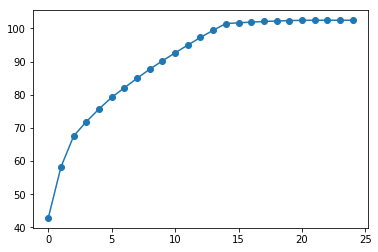

In [23]:
import numpy as np

# sort kbest scores in descending order
kbest_sorted = np.array(sorted(kbest.scores_, reverse=True))

# plot the cumulative sum (sum of scores vs. k)
plt.plot(kbest_sorted.cumsum(), marker='o')

### Plot PCA

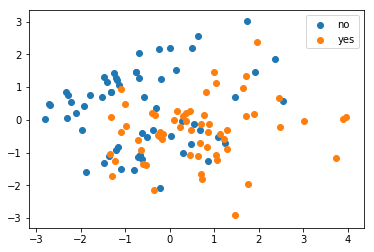

In [24]:
scaler = StandardScaler()

# scaling kbest dataset just to explore for PCA
Z_scaled = scaler.fit_transform(X_kbest)

pca = PCA(n_components=2) # 2 components to plot 2d,
                          # coloured based on yes/no
Z_2d = pca.fit_transform(Z_scaled)

fig, ax = plt.subplots()

# row_selector y==0 (selects all rows where y==0)
# col_selector 0 (selects the 1st column / component)
# Z_2d[y==0, 0]
# plotting 1st vs. 2nd PCA component

ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], label='no') # filter for y==0
ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], label='yes') # filter for y==1
ax.legend()

### Clustering analysis

[Text(0, 0.5, 'Inter-cluster distance'), Text(0.5, 1.0, 'Dendrogram')]

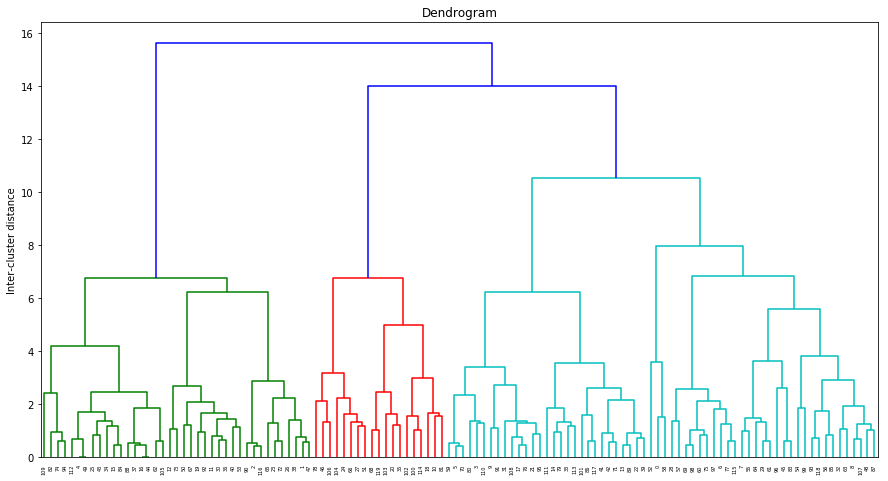

In [25]:
links = linkage(Z_scaled, 'ward')

fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)

ax.set(title='Dendrogram', ylabel='Inter-cluster distance')

In [26]:
# 2 clusters to see how well our dataset separates into 2 classes
agg = AgglomerativeClustering(n_clusters=2)
clusters = agg.fit_predict(Z_scaled)

# determines if clusters are quite dense and separated
# If using clustering alone (no labels), use this to decide
# how tight the data is clustering
from sklearn.metrics import silhouette_score
print(silhouette_score(Z_scaled, clusters))

# since we have the labels...
# If using clustering to support classification, use this
# to determine how well data actually clusters according to labels
#
# https://scikit-learn.org/stable/modules/clustering.html#id18
#
print(homogeneity_completeness_v_measure(y, clusters))

0.1839690933331448
(0.17885109874262128, 0.19659667711665946, 0.18730451462118433)


## Model Engineering

- Train/test split
- Train a Decision Tree Classifier
- Evaluation Metrics
- Visualise the decision tree

In [27]:
Z_train, Z_test, y_train, y_test = train_test_split(Z_scaled, y)

In [28]:
from sklearn.model_selection import cross_validate

# define model
model = DecisionTreeClassifier()

# cross validate
scores = cross_validate(model, Z_train, y_train, cv=5,
                        return_train_score=True,
                        return_estimator=True)

In [29]:
scores

{'fit_time': array([0.00200486, 0.00150299, 0.00100255, 0.00150323, 0.00200486]),
 'score_time': array([0.00050235, 0.00050163, 0.00050235, 0.00050116, 0.00050211]),
 'estimator': (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max

In [30]:
# based on test_score (= cross validation score), selected best model

# find the index of the highest validation score
best_model_index = scores['test_score'].argmax()

# use the index to find the best model
best_model = scores['estimator'][best_model_index]

In [31]:
y_pred = best_model.predict(Z_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.67      0.83      0.74        12

   micro avg       0.77      0.77      0.77        30
   macro avg       0.77      0.78      0.76        30
weighted avg       0.79      0.77      0.77        30

[[13  5]
 [ 2 10]]


In [32]:
# how much information gain is accounted for by each feature
best_model.feature_importances_

array([0.0272497 , 0.16644804, 0.08268809, 0.23391635, 0.48969782])

In [33]:
# get the column names for the features used to fit
# the decision tree

# This is just to get the names of the columns,
# the feature importances of decision tree is unrelated.
X.columns[kbest.get_support()]

Index(['Goal Scored', 'On-Target', 'Off-Target', 'Corners', '1st Goal'], dtype='object')

### Visualise the Decision Tree

In [34]:
# Requires graphviz to be installed with class setup instructions

# if you get an error about dot, check that you don't have
# the old .pdf open somewhere

# from sklearn.tree import export_graphviz
# import graphviz

# filename = 'dtc_fifa.dot'
# export_graphviz(best_model,
#                out_file=filename,
#                feature_names=X.columns[kbest.get_support()],
#                filled=True,
#                rounded=True)

# source = graphviz.Source.from_file(filename)
# source.render(view=True)

## Saving pre-processed data

An exercise of saving data for the next workshop. This is useful when the processing steps are long and complex.

Use: `pd.DataFrame.to_csv`

In [35]:
Z_train.shape

(90, 5)

In [36]:
Z_test.shape

(30, 5)

In [37]:
Z_scaled.shape

(120, 5)

In [38]:
# We can either save: Z_scaled, or
# Z_test and Z_train. Save Z_test / Z_train if you want
# to train other models to compare, because the train_test_split
# order will be preserved
# Otherwise, Z_scaled is fine.

# Z_train and Z_test are numpy arrays. In order to use to_csv
# to save them, we wrap them in pandas Dataframes.
# There is an option to save as pickled numpy arrays but
# these are binary formats
type(Z_test)

numpy.ndarray

In [39]:
headers = X.columns[kbest.get_support()] # add header names
df_train = pd.DataFrame(Z_train, columns=headers)

# add labels (y_train)
df_train[target] = y_train.values # get the numpy array of y_train
df_train.to_csv('fifa_processed_train.csv', header=True, index=False)

df_test = pd.DataFrame(Z_test, columns=headers)

# add labels (y_test)
df_test[target] = y_test.values # get the numpy array of y_train
df_test.to_csv('fifa_processed_test.csv', header=True, index=False)

In [40]:
type(y_train) # index and value is present in pandas Series

# When you assign y_train as a column to any pandas Dataframe
# (df_train), pandas tries to line up the index in y_train
# with the same index in df_train

# this assigns the column named target to df_train
# using the y_train *series*
# because we are using series, y_train has an index
# df_train[target] = y_train

pandas.core.series.Series

In [41]:
pd.read_csv('fifa_processed_train.csv').info() # inspect what we saved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
Goal Scored         90 non-null float64
On-Target           90 non-null float64
Off-Target          90 non-null float64
Corners             90 non-null float64
1st Goal            90 non-null float64
Man of the Match    90 non-null int64
dtypes: float64(5), int64(1)
memory usage: 4.3 KB


## Saving transformers and models

Inventory:
- LabelEncoders
- SelectKBest
- StandardScaler
- models from cross_validate

There's no easy way to save the Clean NaN logic, will need to document or provide a python script.

Even though we already save the pre-processed data, we still save the transformers (SelectKBest, StandardScaler) so that new incoming data can be processed the same way.

Use: `pickle.dump(object, open('filename.pk', wb))`

In [42]:
import pickle

# encoders
pickle.dump(encoders, open('fifa_encoders.pk', 'wb'))

# kbest
pickle.dump(kbest, open('fifa_kbest.pk', 'wb'))

# scaler
pickle.dump(scaler, open('fifa_scaler.pk', 'wb'))

# models
pickle.dump(scores, open('fifa_models.pk', 'wb'))

# Note: can use python zipfile to zip up into .zip
# https://docs.python.org/3.7/library/zipfile.html

In [43]:
!dir *.pk

 Volume in drive C is Windows10_OS
 Volume Serial Number is 30BC-5A12

 Directory of C:\mldds

27/11/2018  02:51 PM             1,558 fifa_encoders.pk
27/11/2018  02:51 PM               815 fifa_kbest.pk
27/11/2018  02:51 PM            19,861 fifa_models.pk
27/11/2018  02:51 PM               636 fifa_scaler.pk
               4 File(s)         22,870 bytes
               0 Dir(s)  123,438,379,008 bytes free


In [44]:
# This logic can be saved into a python file
def clean_nan(df):
    """Cleans NaN columns for FIFA dataset
    Params:
        df - the input dataframe that will be cleaned in place
    """
    # 1st Goal [12. nan 89. 90.  4. 24. 58. 62. 19. ...
    df['1st Goal'].fillna(-1, inplace=True)

    # Own goals [nan  1.]
    df['Own goals'].fillna(0, inplace=True)

    # Own goal Time [nan 90. 81. 32. 37. 47. 23. 74. 33. 12. 13. 18.]
    df['Own goal Time'].fillna(-1, inplace=True)

## Predicting on test data

We'll use `FIFA 2018 Statistics_test.csv` to predict

The order of processing needs to match what's done to the training dataset:
1. Clean NaN
2. LabelEncode
3. SelectKBest
4. Scale

A mismatch in the order can cause poor accuracy.

In [45]:
# Cleaning using utils
import fifa_dataset_utils

# fifa_dataset_utils.clean_nan??

# load test dataset
df_data = pd.read_csv('FIFA 2018 Statistics_test.csv')
df_data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,10-07-2018,France,Belgium,1,40,19,5,8,6,4,...,2,0,0,Yes,51.0,Semi- Finals,No,0,NaN,NaN
1,10-07-2018,Belgium,France,0,60,9,3,5,1,5,...,3,0,0,No,NaN,Semi- Finals,No,0,NaN,NaN
2,11-07-2018,Croatia,England,2,54,22,7,11,4,8,...,2,0,0,Yes,68.0,Semi- Finals,No,0,NaN,NaN
3,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN


In [46]:
fifa_dataset_utils.clean_nan(df_data)
df_data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,10-07-2018,France,Belgium,1,40,19,5,8,6,4,...,2,0,0,Yes,51.0,Semi- Finals,No,0,0.0,-1.0
1,10-07-2018,Belgium,France,0,60,9,3,5,1,5,...,3,0,0,No,-1.0,Semi- Finals,No,0,0.0,-1.0
2,11-07-2018,Croatia,England,2,54,22,7,11,4,8,...,2,0,0,Yes,68.0,Semi- Finals,No,0,0.0,-1.0
3,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,0.0,-1.0


In [47]:
# Drop the Date column
# (maybe put this into the utils python script as well)
df_data.drop('Date', inplace=True, axis=1)

In [48]:
# Label encode

encoders1 = pickle.load(open('fifa_encoders.pk', 'rb'))

df_data['Team'] = encoders1['Team'].transform(df_data['Team'])

In [49]:
# can use a loop like
# for f in encoders.keys():
#    df_data[f] = encoders1[f].transform(df_data[f])

df_data['Opponent'] = encoders1['Opponent'].transform(df_data['Opponent'])
df_data['Man of the Match'] = encoders1['Man of the Match'].transform(df_data['Man of the Match'])
# df_data['Round'] = encoders1['Round'].transform(df_data['Round'])
df_data['PSO'] = encoders1['PSO'].transform(df_data['PSO'])
df_data

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,10,2,1,40,19,5,8,6,4,1,...,2,0,0,1,51.0,Semi- Finals,0,0,0.0,-1.0
1,2,10,0,60,9,3,5,1,5,1,...,3,0,0,0,-1.0,Semi- Finals,0,0,0.0,-1.0
2,6,9,2,54,22,7,11,4,8,1,...,2,0,0,1,68.0,Semi- Finals,0,0,0.0,-1.0
3,9,6,1,46,11,1,6,4,4,3,...,1,0,0,0,5.0,Semi- Finals,0,0,0.0,-1.0


In [50]:
# Update the encoder on the fly if you want to
# include new classes. However, this is not good if this
# column is needed for an accurate result.
# Because the training set didn't have this value!
encoders1['Round'].classes_ = np.append(encoders1['Round'].classes_, 'Semi- Finals')
df_data['Round'] = encoders1['Round'].transform(df_data['Round'])

In [51]:
df_data['Round'] 

0    3
1    3
2    3
3    3
Name: Round, dtype: int32

In [52]:
# encode the remaining column after handing the error above
df_data['PSO'] = encoders1['PSO'].transform(df_data['PSO'])

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\numpy\lib\arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


ValueError: y contains previously unseen labels: [0]

In [53]:
# check that data is encoded
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 26 columns):
Team                      4 non-null int32
Opponent                  4 non-null int32
Goal Scored               4 non-null int64
Ball Possession %         4 non-null int64
Attempts                  4 non-null int64
On-Target                 4 non-null int64
Off-Target                4 non-null int64
Blocked                   4 non-null int64
Corners                   4 non-null int64
Offsides                  4 non-null int64
Free Kicks                4 non-null int64
Saves                     4 non-null int64
Pass Accuracy %           4 non-null int64
Passes                    4 non-null int64
Distance Covered (Kms)    4 non-null int64
Fouls Committed           4 non-null int64
Yellow Card               4 non-null int64
Yellow & Red              4 non-null int64
Red                       4 non-null int64
Man of the Match          4 non-null int32
1st Goal                  4 non-null fl

In [54]:
# kbest

kbest1 = pickle.load(open('fifa_kbest.pk', 'rb'))

y_data = df_data[target]
X_data = df_data.loc[:, df_data.columns != target]

X_data_kbest = kbest1.transform(X_data) # select k features

In [55]:
# scale

scaler1 = pickle.load(open('fifa_scaler.pk', 'rb'))

Z_data_scaled = scaler1.transform(X_data_kbest)
Z_data_scaled

array([[-0.26905711,  0.49255543,  1.18469515, -0.28891613,  0.789538  ],
       [-1.14167477, -0.3962664 , -0.09222178,  0.11422266, -1.093044  ],
       [ 0.60356055,  1.38137727,  2.46161207,  1.32363901,  1.40499749],
       [-0.26905711, -1.28508823,  0.3334172 , -0.28891613, -0.875823  ]])

In [56]:
# predict

scores1 = pickle.load(open('fifa_models.pk', 'rb'))

# find the index of the highest validation score
best_model_index = scores1['test_score'].argmax()

# use the index to find the best model
best_model = scores1['estimator'][best_model_index]

y_data_pred = best_model.predict(Z_data_scaled)
y_data_pred

array([0, 0, 1, 0])

In [57]:
results = pd.read_csv('FIFA 2018 Statistics_test.csv')
results['predictions'] = encoders1[target].inverse_transform(y_data_pred)
results


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,predictions
0,10-07-2018,France,Belgium,1,40,19,5,8,6,4,...,0,0,Yes,51.0,Semi- Finals,No,0,NaN,NaN,No
1,10-07-2018,Belgium,France,0,60,9,3,5,1,5,...,0,0,No,NaN,Semi- Finals,No,0,NaN,NaN,No
2,11-07-2018,Croatia,England,2,54,22,7,11,4,8,...,0,0,Yes,68.0,Semi- Finals,No,0,NaN,NaN,Yes
3,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN,No


In [58]:
scores1['test_score']

array([0.68421053, 0.63157895, 0.44444444, 0.64705882, 0.58823529])

In [60]:
best_model.score?

In [61]:
best_model.score(Z_data_scaled, y_data.values)

0.75